<a href="https://colab.research.google.com/github/sonudk/Introduction_to_AI_and_IoT-/blob/master/end_to_end_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [0]:
fetch_housing_data()

In [0]:
def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path,'housing.csv')
  return pd.read_csv(csv_path)

In [149]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [150]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [151]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f825b530198>,
      dtype=object)

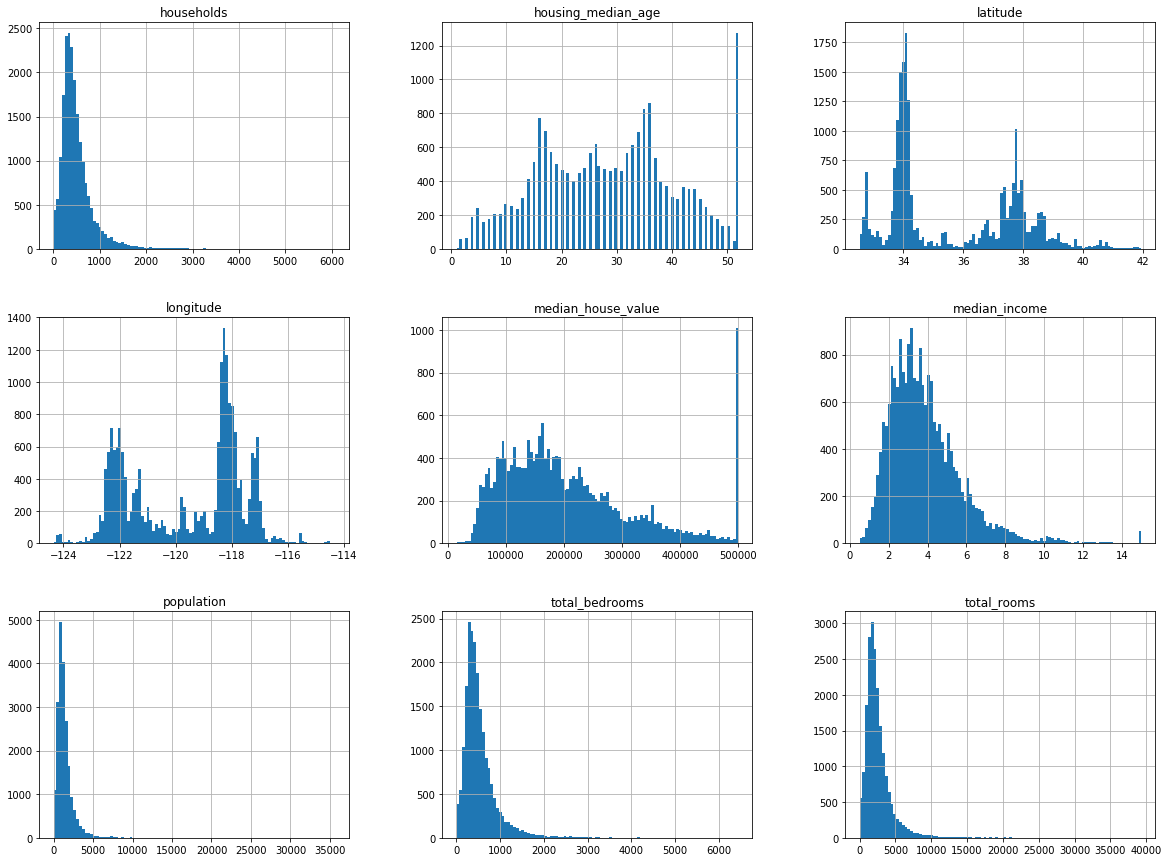

In [152]:
housing.hist(bins = 100,figsize = (20,15))

house age and value are capped at max so that can be an probelm for testing also on training your model might learn that there is no value beyond those caps.

In [0]:
# to split test data randomly so that we don't train model biasly. 
import numpy as np
def split_train_test(data,test_ratio):
  np.random.seed(10) # to generate same shuffled indices
  shuffled_indices = np.random.permutation(data.shape[0])
  test_set_size = int(test_ratio*data.shape[0])
  test_set_indices = shuffled_indices[:test_set_size]
  train_set_indices = shuffled_indices[test_set_size:]
  return data.iloc[test_set_indices] ,data.iloc[train_set_indices]

In [0]:
test_set,train_set = split_train_test(housing,0.2)

In [0]:
# but this will break if we fetch updated dataset


In [155]:
housing.shape

(20640, 10)

In [0]:
housing1 = train_set.copy()

In [157]:
housing1.shape

(16512, 10)

In [158]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12346,-116.52,33.82,21.0,10227.0,2315.0,3623.0,1734.0,2.5212,145200.0,INLAND
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316,117000.0,<1H OCEAN
16824,-122.49,37.63,31.0,3109.0,621.0,1472.0,618.0,5.1550,263900.0,NEAR OCEAN
6869,-118.11,34.06,16.0,2416.0,565.0,1750.0,514.0,2.8229,163700.0,<1H OCEAN
16677,-120.66,35.13,41.0,2666.0,751.0,940.0,507.0,1.9653,236100.0,<1H OCEAN


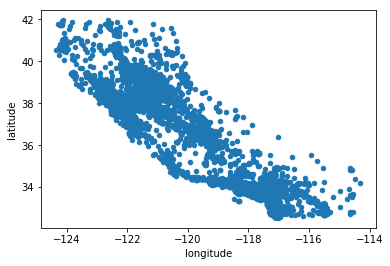

In [159]:
housing1.plot(kind = 'scatter' ,x = 'longitude',y= 'latitude')

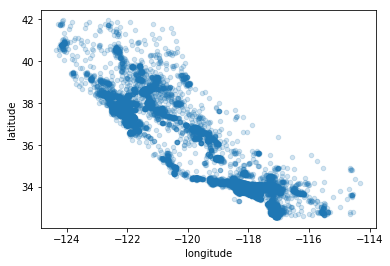

In [160]:
housing1.plot(kind = 'scatter' ,x = 'longitude',y= 'latitude',alpha = 0.2)# alpha introduces opacity so we get idea about density of districta


In [161]:
'''housing.plot(kind = 'scatter' ,x = 'longitude',y= 'latitude',alpha = 0.3,s = housing['population']/100,label = 'population',figsize=(10,20),c='median_house_value',cmap = plt.get_cmap['jet'],colorbar = True,sharex = False)
plt.legend()
save_fig("housing_prices_scatterplot")
# why / population by 100?/'''

'housing.plot(kind = \'scatter\' ,x = \'longitude\',y= \'latitude\',alpha = 0.3,s = housing[\'population\']/100,label = \'population\',figsize=(10,20),c=\'median_house_value\',cmap = plt.get_cmap[\'jet\'],colorbar = True,sharex = False)\nplt.legend()\nsave_fig("housing_prices_scatterplot")\n# why / population by 100?/'

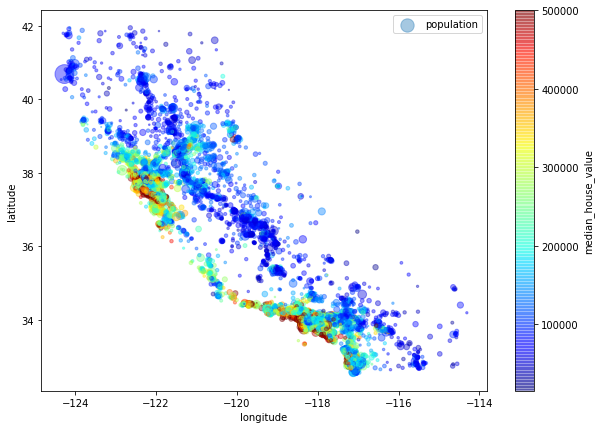

In [162]:
housing1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")

In [0]:
##lokking for sorrelation
corr_matrix = housing1.corr()

In [164]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687393
total_rooms           0.132733
housing_median_age    0.108758
households            0.063866
total_bedrooms        0.047020
population           -0.027357
longitude            -0.045095
latitude             -0.145205
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f825a928828>,
      dtype=object)

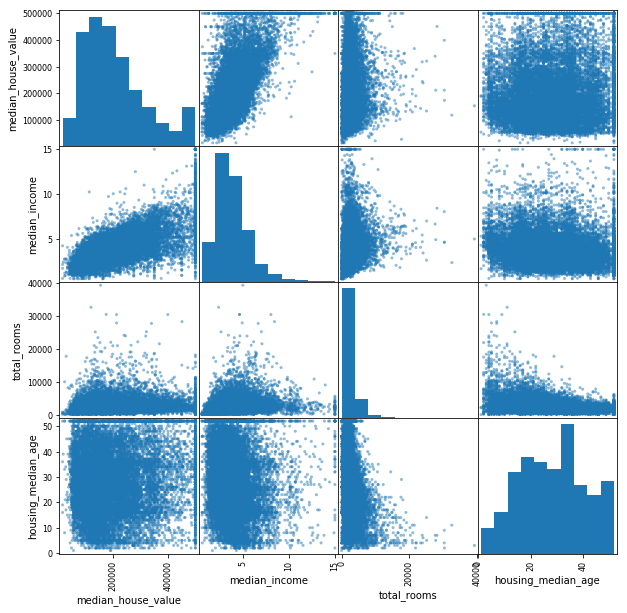

In [165]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']# here we give our attributes b/w thwm we want to plot scatter_matrix
scatter_matrix(housing1[attributes],figsize = (10,10))#here we give input to magic fun scatter_matrix

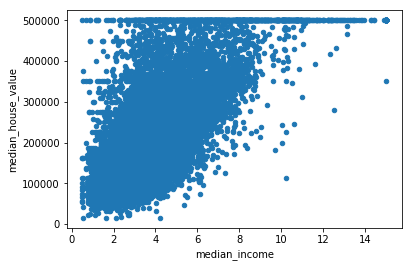

In [166]:
housing1.plot(kind = 'scatter',x = 'median_income',y = 'median_house_value')

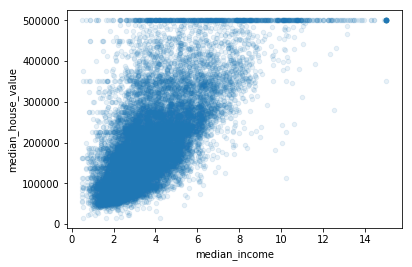

In [167]:
housing1.plot(kind = 'scatter',x = 'median_income',y = 'median_house_value',alpha = 0.1)

**experimanting with attribute combinations**

In [168]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
housing1['rooms_per_household'] = housing1['total_rooms']/housing1['households']
housing1['bedrooms_per_room'] = housing1['total_bedrooms']/housing1['total_rooms']
housing1['population_per_houshold'] = housing1['population']/housing1['households']

In [0]:
corr_matrix = housing1.corr()

In [171]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687393
rooms_per_household        0.147215
total_rooms                0.132733
housing_median_age         0.108758
households                 0.063866
total_bedrooms             0.047020
population                -0.027357
population_per_houshold   -0.032384
longitude                 -0.045095
latitude                  -0.145205
bedrooms_per_room         -0.255872
Name: median_house_value, dtype: float64

[0, 6, 0, 550000]

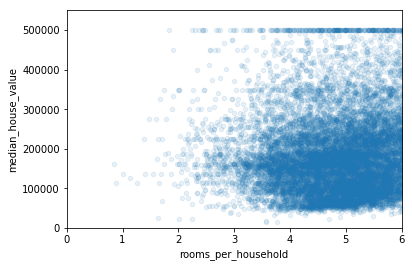

In [172]:
housing1.plot(kind='scatter',x='rooms_per_household',y='median_house_value',alpha=0.1)

plt.axis([0,6,0,550000])

Preparing the data for ML algorithms

In [0]:
housing1 = train_set.drop('median_house_value',axis=1)

In [193]:
housing.shape

(20640, 10)

In [0]:
housing_labels=train_set['median_house_value'].copy()

In [0]:
#data cleaning
#1>housing1.dropna(subset = 'total_bedrooms')
#2>housing1.drop('total_bedrooms',axis=1)
median = housing1['total_bedrooms'].median()
housing1['total_bedrooms'].fillna(median,inplace=True)

In [196]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [197]:
from sklearn.impute import SimpleImputer
impute =SimpleImputer(strategy='median')
housing_num = housing1.drop('ocean_proximity',axis=1)
housing_cat = housing1[['ocean_proximity']]
impute.fit(housing_num)
impute.statistics_
housing_num.median().values

array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.12500000e+03,
        4.35000000e+02,  1.16550000e+03,  4.09000000e+02,  3.53245000e+00,
        1.79650000e+05,  5.22217106e+00,  2.03491610e-01,  2.81772867e+00])

In [0]:
X = impute.transform(housing_num)

In [0]:
#to put data back into dataframe
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [200]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_houshold
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.576537,35.639689,28.610828,2630.266231,536.593689,1425.947977,499.244247,3.863304,206456.047905,5.431610,0.213353,3.026987
std,2.006371,2.139067,12.625188,2156.126492,416.527776,1136.202481,379.327161,1.891345,115034.800393,2.596377,0.058400,6.424072
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1449.000000,297.000000,785.000000,279.000000,2.559200,119600.000000,4.434542,0.175655,2.429227
50%,-118.500000,34.260000,29.000000,2125.000000,435.000000,1165.500000,409.000000,3.532450,179650.000000,5.222171,0.203492,2.817729
75%,-118.010000,37.720000,37.000000,3142.250000,643.000000,1730.000000,606.000000,4.739700,263900.000000,6.055338,0.240000,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,599.714286


In [201]:
housing_cat.head()

,ocean_proximity
12346,INLAND
19326,<1H OCEAN
16824,NEAR OCEAN
6869,<1H OCEAN
16677,<1H OCEAN


In [203]:
#ordinal incoder
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [4.],
       [0.],
       [0.],
       [3.],
       [3.],
       [3.],
       [0.],
       [1.]])

In [204]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [205]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
housing_cat_1hot=onehot.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

 output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After onehot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array,21 but if you really want to convert it to a (dense) NumPy array, just call the toarray() method: 

In [206]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [207]:
onehot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]